In [3]:
pip install obsei

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 96 kB 7.5 MB/s 
     |████████████████████████████████| 6.3 MB 64.5 MB/s 
     |████████████████████████████████| 288 kB 56.5 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 11.1 MB 21.9 MB/s 
     |████████████████████████████████| 503 kB 59.2 MB/s 
     |████████████████████████████████| 114 kB 60.8 MB/s 
     |████████████████████████████████| 96 kB 7.4 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 58.1 MB/s 
     |████████████████████████████████| 93 kB 2.3 MB/s 
     |████████████████████████████████| 6.6 MB 35.0 MB/s 
     |████████████████████████████████| 339 kB 60.3 MB/s 
     |████████████████████████████████| 457 

In [4]:
pip install wandb==0.12.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.1 MB/s 
     |████████████████████████████████| 157 kB 46.9 MB/s 
     |████████████████████████████████| 1.0 MB 45.0 MB/s 
     |████████████████████████████████| 181 kB 41.0 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 139 kB 54.3 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=3d1fbbdf849a68ddd752ec140c92b72e0ab0d8f3d9f6a8ac32acc2f39d88ae91
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.10
    Uninstalling urllib3-1.26.10:
      Successfully uninstalled urllib3-1.26.10
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.2
    Uninstalling prot

In [5]:
pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
import sys

In [133]:
from obsei.source import YoutubeScrapperSource, YoutubeScrapperConfig
from obsei.analyzer.classification_analyzer import ClassificationAnalyzerConfig, ZeroShotClassificationAnalyzer

In [134]:
from obsei.analyzer.classification_analyzer import ZeroShotClassificationAnalyzer

In [135]:
video_url = 'https://www.youtube.com/watch?v=oh69Ou2-RGk'

In [156]:


source_config = YoutubeScrapperConfig(
    video_url= video_url,
    fetch_replies=False,
    max_comments="200",
    lookup_period="1Y",
    sort_by=1,
)



In [157]:
from obsei.misc.youtube_reviews_scrapper import YouTubeCommentExtractor

In [158]:
source = YoutubeScrapperSource()

source_response_list = source.lookup(source_config)

In [159]:
for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")

source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'UgyXYJd3v9_H20b5drt4AaABAg', 'text': 'https://t.me/veskerconlive/10\nВот моя телега, туда я буду выкладывать новые мемы и видосы! Заходи давай, а то ютубу осталось жить примерно пару дней...', 'time': datetime.datetime(2022, 3, 22, 12, 6, 44, 972382, tzinfo=datetime.timezone.utc), 'author': 'VESKERCON LIVE', 'channel': 'UCpXLQX8YLEKwAMJZP46YnWQ', 'votes': '25', 'photo': 'https://yt3.ggpht.com/ytc/AMLnZu9sGpuFTcFsvSOgF3v09AHIAwuoe4MUf5zgf-NQ=s176-c-k-c0x00ffffff-no-rj', 'heart': True}, 'source_name': 'YoutubeScrapper', 'processed_text': 'https://t.me/veskerconlive/10\nВот моя телега, туда я буду выкладывать новые мемы и видосы! Заходи давай, а то ютубу осталось жить примерно пару дней...'}'
source_response#'1'='{'segmented_data': {}, 'meta': {'comment_id': 'UgwEIMuH5q23fVIxyBF4AaABAg', 'text': 'Как помне самый ржачный мем 2021 года', 'time': datetime.datetime(2021, 11, 22, 12, 6, 44, 974947, tzinfo=datetime.timezone.utc

In [140]:
text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)

In [141]:
analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [161]:
from google.colab import output
output.enable_custom_widget_manager()

In [143]:
from google.colab import output
output.disable_custom_widget_manager()

In [144]:
for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

analyzer_response#'0'='{'segmented_data': {'classifier_data': {'negative': 0.6933870911598206, 'positive': 0.5903364419937134}}, 'meta': {'comment_id': 'UgyXYJd3v9_H20b5drt4AaABAg', 'text': 'https://t.me/veskerconlive/10\nВот моя телега, туда я буду выкладывать новые мемы и видосы! Заходи давай, а то ютубу осталось жить примерно пару дней...', 'time': datetime.datetime(2022, 3, 22, 12, 4, 39, 552647, tzinfo=datetime.timezone.utc), 'author': 'VESKERCON LIVE', 'channel': 'UCpXLQX8YLEKwAMJZP46YnWQ', 'votes': '25', 'photo': 'https://yt3.ggpht.com/ytc/AMLnZu9sGpuFTcFsvSOgF3v09AHIAwuoe4MUf5zgf-NQ=s176-c-k-c0x00ffffff-no-rj', 'heart': True}, 'source_name': 'YoutubeScrapper', 'processed_text': 'https://t.me/veskerconlive/10\nВот моя телега, туда я буду выкладывать новые мемы и видосы! Заходи давай, а то ютубу осталось жить примерно пару дней...'}'
analyzer_response#'1'='{'segmented_data': {'classifier_data': {'negative': 0.6649123430252075, 'positive': 0.4463593065738678}}, 'meta': {'comment_i

In [145]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(
   dataframe=DataFrame()
)
sink = PandasSink()

In [146]:
dataframe = sink.send_data(analyzer_response_list, sink_config)

In [147]:
dataframe

,processed_text,segmented_data_classifier_data_negative,segmented_data_classifier_data_positive,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,"https://t.me/veskerconlive/10\nВот моя телега,...",0.69,0.59,UgyXYJd3v9_H20b5drt4AaABAg,"https://t.me/veskerconlive/10\nВот моя телега,...",2022-03-22 12:04:39.552647+00:00,VESKERCON LIVE,UCpXLQX8YLEKwAMJZP46YnWQ,25,https://yt3.ggpht.com/ytc/AMLnZu9sGpuFTcFsvSOg...,True,YoutubeScrapper
1,Как помне самый ржачный мем 2021 года,0.66,0.45,UgwEIMuH5q23fVIxyBF4AaABAg,Как помне самый ржачный мем 2021 года,2021-11-22 12:04:39.555225+00:00,STUDIO ATAMAN'A???,UC-O48xadCb8F9flqzXRrUxw,1.3K,https://yt3.ggpht.com/doGfsEJuis2yE38OKvTCVYJh...,True,YoutubeScrapper
2,"Используйте это видео , чтобы очистить динамик...",0.80,0.05,UgzznLav-yfBehoEST14AaABAg,"Используйте это видео , чтобы очистить динамик...",2021-12-22 12:04:39.557578+00:00,Marakut,UCZQ4shbIKh3GnYkObdcuSQQ,917,https://yt3.ggpht.com/ytc/AMLnZu97Ogu212VdYDxM...,True,YoutubeScrapper
3,Я: огрызнулся училке\nМнения одноклассников:,0.45,0.37,UgyPe4OZ2vEJOAZ4Qz14AaABAg,Я: огрызнулся училке\nМнения одноклассников:,2021-10-22 12:04:39.559785+00:00,Artyom Ld,UCpdC95CzbKqyg1IcdRZ8NYQ,2.1K,https://yt3.ggpht.com/ytc/AMLnZu-PBS3YZUTA0jlJ...,True,YoutubeScrapper
4,Для полного погружения в мем нужно поставить 144р,0.78,0.16,UgyfzSr4mkJnGY2i4I94AaABAg,Для полного погружения в мем нужно поставить 144р,2022-01-22 12:04:39.561847+00:00,Arkhipov Erkhan,UC_i8OQOHHI3Clt-E0E1rcKA,196,https://yt3.ggpht.com/ytc/AMLnZu_2JexPdJfFOpAM...,False,YoutubeScrapper
5,0:00 Литература\n0:02 Математика\n0:05 Информа...,0.56,0.56,UgzMT4ux5bpKdpR18vd4AaABAg,0:00 Литература\n0:02 Математика\n0:05 Информа...,2022-01-22 12:04:39.563921+00:00,Кирилл Крылов,UCsw4KIBCqk2TG7AxWsp5yRA,40,https://yt3.ggpht.com/ytc/AMLnZu-tlkZCYR-n8itq...,False,YoutubeScrapper
6,"доктор: вам осталось жить 1 минуту, на что вы ...",0.66,0.67,UgxTizY4BNQxVFI4IUF4AaABAg,"доктор: вам осталось жить 1 минуту, на что вы ...",2021-12-22 12:04:39.566057+00:00,GG PUBG,UCK7e-SzI-ONzR15FBLq8qTA,637,https://yt3.ggpht.com/ytc/AMLnZu_IrwJY2rgzRq5V...,True,YoutubeScrapper
7,"Настолько хорошее качество видео, что я смотря...",0.56,0.24,UgxW7oTIlq9GvB-QWr54AaABAg,"Настолько хорошее качество видео, что я смотря...",2022-05-22 12:04:39.568011+00:00,Витя Котяткин,UCcvr-QMXJvw130wKkYBaqig,3,https://yt3.ggpht.com/m3L3DVpPzgDsFegvNyhGw1U_...,True,YoutubeScrapper
8,Тот самый чел в кс с шипящим микрофоном:,0.74,0.56,Ugy5oeGooQYgCBDgF994AaABAg,Тот самый чел в кс с шипящим микрофоном:,2021-10-22 12:04:39.569938+00:00,Бубнов Павел,UCn76QEPk7HT8nVE0MV8hY8Q,367,https://yt3.ggpht.com/ytc/AMLnZu8KDwAkUvPV9nv4...,True,YoutubeScrapper
9,"Голосок за кадром конечно ""ангельский""... 😊",0.87,0.43,Ugwo_FD3uVv2jnPa71J4AaABAg,"Голосок за кадром конечно ""ангельский""... 😊",2021-10-22 12:04:39.571898+00:00,Злой Арлекин RYTP,UC0R6SIOCHJYOOGT9dvf1nXg,134,https://yt3.ggpht.com/ytc/AMLnZu8OahbNMlDh2gYW...,True,YoutubeScrapper


In [148]:
import pandas as pd

In [149]:
dataframe.loc[dataframe['segmented_data_classifier_data_negative'].astype('float')>0.5]

,processed_text,segmented_data_classifier_data_negative,segmented_data_classifier_data_positive,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,"https://t.me/veskerconlive/10\nВот моя телега,...",0.69,0.59,UgyXYJd3v9_H20b5drt4AaABAg,"https://t.me/veskerconlive/10\nВот моя телега,...",2022-03-22 12:04:39.552647+00:00,VESKERCON LIVE,UCpXLQX8YLEKwAMJZP46YnWQ,25,https://yt3.ggpht.com/ytc/AMLnZu9sGpuFTcFsvSOg...,True,YoutubeScrapper
1,Как помне самый ржачный мем 2021 года,0.66,0.45,UgwEIMuH5q23fVIxyBF4AaABAg,Как помне самый ржачный мем 2021 года,2021-11-22 12:04:39.555225+00:00,STUDIO ATAMAN'A???,UC-O48xadCb8F9flqzXRrUxw,1.3K,https://yt3.ggpht.com/doGfsEJuis2yE38OKvTCVYJh...,True,YoutubeScrapper
2,"Используйте это видео , чтобы очистить динамик...",0.80,0.05,UgzznLav-yfBehoEST14AaABAg,"Используйте это видео , чтобы очистить динамик...",2021-12-22 12:04:39.557578+00:00,Marakut,UCZQ4shbIKh3GnYkObdcuSQQ,917,https://yt3.ggpht.com/ytc/AMLnZu97Ogu212VdYDxM...,True,YoutubeScrapper
4,Для полного погружения в мем нужно поставить 144р,0.78,0.16,UgyfzSr4mkJnGY2i4I94AaABAg,Для полного погружения в мем нужно поставить 144р,2022-01-22 12:04:39.561847+00:00,Arkhipov Erkhan,UC_i8OQOHHI3Clt-E0E1rcKA,196,https://yt3.ggpht.com/ytc/AMLnZu_2JexPdJfFOpAM...,False,YoutubeScrapper
5,0:00 Литература\n0:02 Математика\n0:05 Информа...,0.56,0.56,UgzMT4ux5bpKdpR18vd4AaABAg,0:00 Литература\n0:02 Математика\n0:05 Информа...,2022-01-22 12:04:39.563921+00:00,Кирилл Крылов,UCsw4KIBCqk2TG7AxWsp5yRA,40,https://yt3.ggpht.com/ytc/AMLnZu-tlkZCYR-n8itq...,False,YoutubeScrapper
6,"доктор: вам осталось жить 1 минуту, на что вы ...",0.66,0.67,UgxTizY4BNQxVFI4IUF4AaABAg,"доктор: вам осталось жить 1 минуту, на что вы ...",2021-12-22 12:04:39.566057+00:00,GG PUBG,UCK7e-SzI-ONzR15FBLq8qTA,637,https://yt3.ggpht.com/ytc/AMLnZu_IrwJY2rgzRq5V...,True,YoutubeScrapper
7,"Настолько хорошее качество видео, что я смотря...",0.56,0.24,UgxW7oTIlq9GvB-QWr54AaABAg,"Настолько хорошее качество видео, что я смотря...",2022-05-22 12:04:39.568011+00:00,Витя Котяткин,UCcvr-QMXJvw130wKkYBaqig,3,https://yt3.ggpht.com/m3L3DVpPzgDsFegvNyhGw1U_...,True,YoutubeScrapper
8,Тот самый чел в кс с шипящим микрофоном:,0.74,0.56,Ugy5oeGooQYgCBDgF994AaABAg,Тот самый чел в кс с шипящим микрофоном:,2021-10-22 12:04:39.569938+00:00,Бубнов Павел,UCn76QEPk7HT8nVE0MV8hY8Q,367,https://yt3.ggpht.com/ytc/AMLnZu8KDwAkUvPV9nv4...,True,YoutubeScrapper
9,"Голосок за кадром конечно ""ангельский""... 😊",0.87,0.43,Ugwo_FD3uVv2jnPa71J4AaABAg,"Голосок за кадром конечно ""ангельский""... 😊",2021-10-22 12:04:39.571898+00:00,Злой Арлекин RYTP,UC0R6SIOCHJYOOGT9dvf1nXg,134,https://yt3.ggpht.com/ytc/AMLnZu8OahbNMlDh2gYW...,True,YoutubeScrapper
10,00:00 - харош \n00:03 - мегахарош\n00:05 - уль...,0.57,0.54,Ugw_Skkc9HMySmMiZK94AaABAg,00:00 - харош \n00:03 - мегахарош\n00:05 - уль...,2021-12-22 12:04:39.573829+00:00,Andrey Sofiev,UCCDSzfZTlqdqf76XPk9hJ5w,150,https://yt3.ggpht.com/ytc/AMLnZu8ua840P9lp8Wpj...,True,YoutubeScrapper


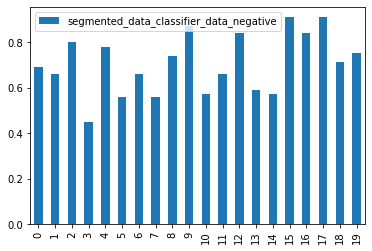

In [150]:


dataframe[['segmented_data_classifier_data_negative']].astype('float').plot.bar()



In [151]:
pd.set_option('display.max_rows', None)

In [152]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [153]:
dataframe["processed_text"].head(500)

0     https://t.me/veskerconlive/10\nВот моя телега,...
1                 Как помне самый ржачный мем 2021 года
2     Используйте это видео , чтобы очистить динамик...
3          Я: огрызнулся училке\nМнения одноклассников:
4     Для полного погружения в мем нужно поставить 144р
5     0:00 Литература\n0:02 Математика\n0:05 Информа...
6     доктор: вам осталось жить 1 минуту, на что вы ...
7     Настолько хорошее качество видео, что я смотря...
8              Тот самый чел в кс с шипящим микрофоном:
9           Голосок за кадром конечно "ангельский"... 😊
10    00:00 - харош \n00:03 - мегахарош\n00:05 - уль...
11    Ничего не имею против канала, автор молоток, ч...
12    Мой внутренний голос при каждой возможносьи по...
13        пов: озвучка при каждом киле на пабликах в кс
14    А прикиньте поставить это на колонке на полную...
15          Когда получил разрешение на торговлю бэброй
16           Смотреть это в наушниках одно удовольствие
17                               Вот это настоящ

In [154]:
display(dataframe["processed_text"].head(5000))

0     https://t.me/veskerconlive/10\nВот моя телега,...
1                 Как помне самый ржачный мем 2021 года
2     Используйте это видео , чтобы очистить динамик...
3          Я: огрызнулся училке\nМнения одноклассников:
4     Для полного погружения в мем нужно поставить 144р
5     0:00 Литература\n0:02 Математика\n0:05 Информа...
6     доктор: вам осталось жить 1 минуту, на что вы ...
7     Настолько хорошее качество видео, что я смотря...
8              Тот самый чел в кс с шипящим микрофоном:
9           Голосок за кадром конечно "ангельский"... 😊
10    00:00 - харош \n00:03 - мегахарош\n00:05 - уль...
11    Ничего не имею против канала, автор молоток, ч...
12    Мой внутренний голос при каждой возможносьи по...
13        пов: озвучка при каждом киле на пабликах в кс
14    А прикиньте поставить это на колонке на полную...
15          Когда получил разрешение на торговлю бэброй
16           Смотреть это в наушниках одно удовольствие
17                               Вот это настоящ

In [155]:
dataframe[["processed_text"]].head(500)

,processed_text
0,"https://t.me/veskerconlive/10\nВот моя телега,..."
1,Как помне самый ржачный мем 2021 года
2,"Используйте это видео , чтобы очистить динамик..."
3,Я: огрызнулся училке\nМнения одноклассников:
4,Для полного погружения в мем нужно поставить 144р
5,0:00 Литература\n0:02 Математика\n0:05 Информа...
6,"доктор: вам осталось жить 1 минуту, на что вы ..."
7,"Настолько хорошее качество видео, что я смотря..."
8,Тот самый чел в кс с шипящим микрофоном:
9,"Голосок за кадром конечно ""ангельский""... 😊"
